In [4]:
import pandas as pd

([<matplotlib.axis.XTick at 0x7fa1466077f0>,
 [Text(0, 0, 'none'),
  Text(1, 0, 'Quantile'),
  Text(2, 0, 'Log'),
  Text(3, 0, 'Sigmoid')])

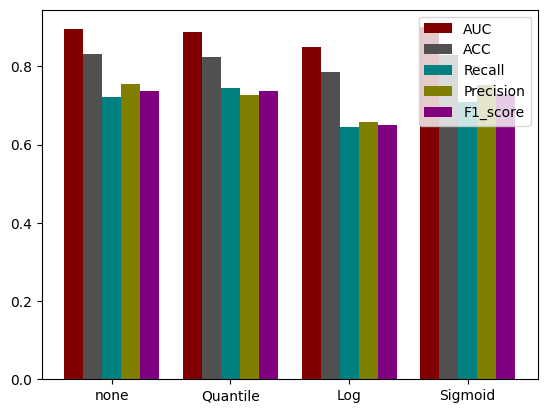

In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#color def

color_dict = {'none' : '#FF0000',
              'Sigmoid': '#00FF00',
              'Quantile':'#0000FF',
              'Log':'#00FFFF',
              'AUC':'#800000',
              'ACC':'#505050',
              'Recall':'#008080',
              'Precision':'#808000',
              'F1_score':'#800080'}



headerInf = 'Encoding_classifier, AUC, ACC, Recall, Precision, F1_score, time-end, runtime(sec), classfication time(sec), best hyper-parameter'.replace(' ','').split(',')

files = os.listdir('GalaxyDeepMicroOutput')

dfs = []
for file in files:
    df = pd.read_csv(f'GalaxyDeepMicroOutput/{file}',header=None,index_col=0)
    df = df.reset_index()
    file_info = file.split('_')
    df.insert(0,"Normalization",file_info[3])
    df.insert(0,"Phylum_Depth",file_info[2].replace('-1',"None"))
    df.insert(0,"TableSize",file_info[1])
    df.insert(0,"File_Name",file)
    dfs.append(df)


main_df = pd.concat(dfs,axis=0)
header = ["file","Size","Phylum_Depth","Normalization"]
header += headerInf
main_df.columns = header
#main_df.plot(x='file',y='ACC')
main_df = main_df.reset_index()
main_df = main_df.drop(columns=["index"])

main_df.to_csv("AnalysisSummary.tsv",sep='\t')

classifier = "AE[20]_mlp"
phylum_depth = "1"



c1 = main_df["Encoding_classifier"] == classifier
c2 = main_df["Phylum_Depth"] == phylum_depth

data_df = main_df.loc[(c1 & c2)]

x_axis = data_df['Normalization'].tolist()

x_indexes = np.arange(len(x_axis))

plotted_data = ['AUC','ACC','Recall','Precision','F1_score']

width = 0.8 / len(plotted_data)

for i in range(len(plotted_data)):
    bar = plotted_data[i]
    offset = i - (len(plotted_data)-1)/2
    y_data = data_df[bar].tolist()
    plt.bar(x_indexes + offset * width,y_data, width=width,label=bar,color=color_dict[bar])
plt.legend()
plt.xticks(ticks=x_indexes,labels=x_axis)

#main_df

([<matplotlib.axis.XTick at 0x7fa1466725f0>,
 [Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, ''), Text(3, 0, '')])

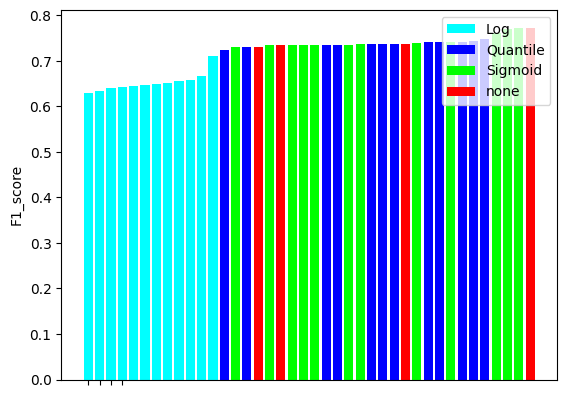

In [6]:
#classifier = "AE[20]_mlp"
data_df = main_df

plotted_data_type = "F1_score"

# pipeline_version = "5.0"


#c1 = main_df["Encoding_classifier"] == classifier

#data_df = data_df.loc[(c1)]

data_df = data_df.sort_values(by=[plotted_data_type])

sort_by = data_df["Normalization"].tolist()

data = {}

for sort_type in sort_by:
    data[sort_type] = []

sort_type_list = data_df["Normalization"].tolist()
datapoint_list = data_df[plotted_data_type].tolist()

for i in range(len(datapoint_list)):
    for k in data.keys():
        if(k == sort_type_list[i]):
            data[k].append(datapoint_list[i])
        else:
            data[k].append(0)


x_axis = [_ for _ in range(len(sort_type_list))]

for k in data.keys():
    plt.bar(x_axis,data[k],color=color_dict[k], label=k)
plt.legend()
plt.ylabel(plotted_data_type)
plt.xticks(ticks=x_indexes,labels="")
#data_df
#main_df